In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = False

from scipy.misc import derivative

'''I use the piecewise linear Ritz method to solve a second order  ordinary differential equation with a nonzero RHS
The d.e is of the form :  - d/dx(  k(x)dy/dx) + q(x)y = f(x).
The integration is performed on the interval a<=x<=b'''



#coefficient functions 
def k(x, k1 = 1,k2 = np.pi,k3 = 0):
    '''Defining the coefficient k in the d.e.'''
    return k1*np.sin(k2*x) + k3

def q(x, q1 = 1,q2 = np.pi,q3 = 0):
    '''Defining the coefficient q in the d.e.'''
    return q1*np.cos(q2*x) + q3


def p(x, p1 = 1,p2 = np.pi,p3 = 0):
    '''Defining the coefficient p in the d.e.'''
    return p1*np.sin(p2*x) + p3




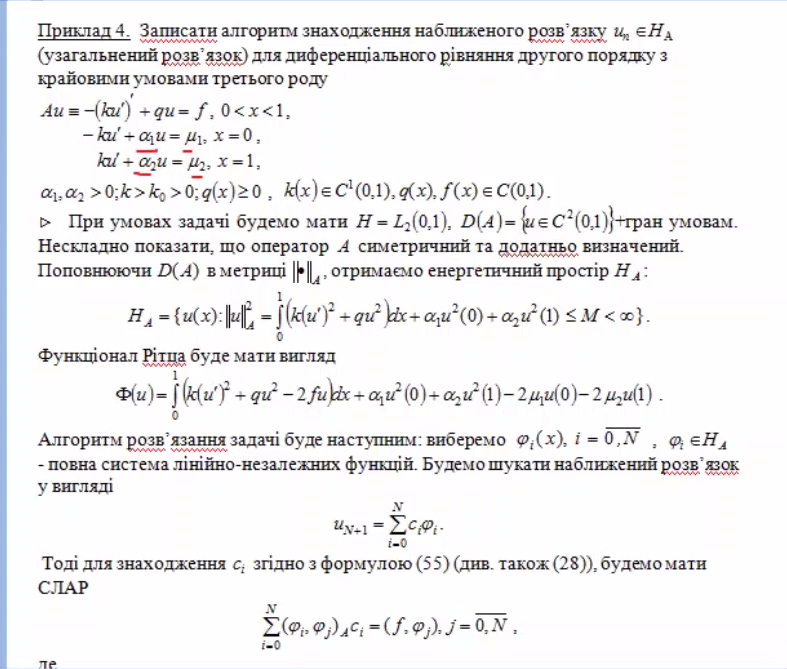

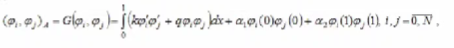

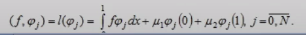

In [2]:
m = 4
def basis1(x, m =4,a =0 ,b =1):
    return np.array([(x)**i*(1-x)**i for i in range(m)])

In [14]:
alpha1 = 10
alpha2 = 20

def find_params(k_x, q_x, p_x, a1, a2, a, b, real):
    
    du = lambda a: (real(a+1/10000) - real(a))/(1/10000)
    f_x = lambda x: -(k_x(x+1/10000)*du(x+1/10000) - k_x(x)*du(x))/(1/10000) + q_x*real(x)



    mu1 = -du(a) * k_x(a) + a1*real(a)
    mu2 = du(a)* k_x(b) + a2*real(b)
    return f_x, mu1, mu2

def real(x, p1=2, p2=np.pi, p3=0):
    '''Defining the coefficient p in the d.e.'''
    return p1 * np.sin(p2 * x) + p3

a = 0
b = 4

rhs, mu1, mu2 = find_params(k,0,p, alpha1, alpha2, a, b, real)






A1 =  (alpha2*mu1-alpha1*mu2)/(alpha2*(-k(a)+a*alpha1)-alpha1*(k(b)+b*alpha2))
print(A1)
B1 =  (k(b)*A1+alpha2*b*A1-mu2)/(-alpha2)
print(B1)

-2.8340277307104416e-16
-0.0


In [15]:
A2 = b + k(b)*(b-a)/(2*k(b)+alpha2*(b-a)) 
print(A2)
B2 = a -k(a)*(b-a)/(2*k(a)+alpha1*(b-a))
B2

4.0


0.0

In [16]:
def W_basis1(x,m=4,a=0,b=4):
    result = [(x-a)**2*(x-A2), (x-B2)*(b-x)**2]
    result.extend([((x-a)**(2))*(x-A2)**i for i in range(2,m)])
    
    return np.array(result)

In [17]:
def W_basis(x,m=4,a=0,b=4):
    #result = [(x-a)**2*(x-A2), (x-B2)*(b-x)**2]
    result = []
    result.extend([np.cos(i*x) for i in range(m)])
    
    return np.array(result)
def ph1_dot_phi2_corr(k, q, a, b, alpha1, alpha2,m,basis, n = 1000):

    step = (b-a)/(n-1)
    result = np.zeros((m**2, 1))
    for i in range(m):
        for j in  range(m):
            dbasisi = lambda x: (basis(x+step,m,a, b)[i] - basis(x,m,a, b)[i])/step
            dbasisj = lambda x: (basis(x+step,m,a, b)[j] - basis(x,m,a, b)[j])/step
            dkphi = lambda x: (k(x+step) * dbasisi(x+step) - k(x) * dbasisi(x))/step
            sumij = alpha1* basis(a,m,a, b)[i]* basis(a,m,a, b)[j] + alpha2* basis(b,m,a, b)[j] * basis(b,m,a, b)[i]
            for l in range(n):
                
                #sumij += (-dkphi(l*step + a) +basis(l*step +a,m,a, b)[i] ) * basis(l*step +a,m,a, b)[j] *step
                sumij += (k(a+l*step)*dbasisi(a+l*step)*dbasisj(a+l*step) + q(l*step+a)* 
                          basis(l*step+a,m,a, b)[j] * basis(l*step+a,m,a, b)[i]) *step
            result[i*m+j] = sumij
    return result.reshape((m,m))



def f_dot_phij_corr(f, mu1, mu2,a,b,m,basis, n = 1000):
    result = np.zeros((m,1))
    step = (b-a)/(n-1)
    for j in range(m):
        sumij = mu1*basis(a,m,a, b)[j] + mu2*basis(b,m,a, b)[j]
        for i in range(n):
            sumij += f(a+i*step)*basis(a+i*step,m,a, b)[j]*step
        result[j,0] = sumij
    return result


def ph1_dot_phi2_corr_bub(k, q, a, b, alpha1, alpha2,m,basis, n = 1000):

    step = (b-a)/(n-1)
    result = np.zeros((m**2, 1))
    for i in range(m):
        for j in  range(m):
            dbasisi = lambda x: (basis(x+step,m,a, b)[i] - basis(x,m,a, b)[i])/step
            dbasisj = lambda x: (basis(x+step,m,a, b)[j] - basis(x,m,a, b)[j])/step
            dkphi = lambda x: (k(x+step) * dbasisi(x+step) - k(x) * dbasisi(x))/step
            sumij = 0
            for l in range(n):
                
                sumij += (-dkphi(l*step + a) +basis(l*step +a,m,a, b)[i] ) * basis(l*step +a,m,a, b)[j] *step
                
            result[i*m+j] = sumij
    return result.reshape((m,m))



def f_dot_phij_corr_bub(f, mu1, mu2,a,b,m,basis, n = 1000):
    result = np.zeros((m,1))
    step = (b-a)/(n-1)
    for j in range(m):
        sumij = 0
        for i in range(n):
            sumij += f(a+i*step)*basis(a+i*step,m,a, b)[j]*step
        result[j,0] = sumij
    return result

In [18]:
def draw(k, q,f, mu1, mu2,a,b, alpha1, alpha2,m,basis, n = 10000):
    
    #right = f_dot_phij_corr(lambda x: rhs(x) - A1*x - B1, mu1, mu2,a,b,m,W_basis, n )
    right = f_dot_phij_corr(lambda x: rhs(x) , mu1, mu2,a,b,m,W_basis, n )
    left =ph1_dot_phi2_corr(k,q, a, b, alpha1, alpha2, m,W_basis, n )
    answ = np.linalg.solve(left,right)
    
    right2 = f_dot_phij_corr_bub(lambda x: rhs(x) - A1*x - B1 , mu1, mu2,a,b,m,W_basis1, n )
    left2 =ph1_dot_phi2_corr_bub(k,q, a, b, alpha1, alpha2, m, W_basis1, n )
    answ2 = np.linalg.solve(left2,right2)
    
    
    
    
    X = np.linspace(a,b,1001)
    #Y = [(answ.reshape((1,-1)) @ W_basis(x,m)).reshape((1,-1))[0] + A1*x + B1  for x in X]
    Y = [(answ.reshape((1,-1)) @ W_basis(x,m)).reshape((1,-1))[0]   for x in X]
    Y2 = [(answ2.reshape((1,-1)) @ W_basis1(x,m)).reshape((1,-1))[0] + A1*x + B1  for x in X]
    #plt.plot(X, Y,X ,np.array([real(x) for x in X]),  X, Y2)
    plt.figure(figsize=(10, 6))
    
    plt.plot(X, Y, label="Ritz")
    plt.plot(X,np.array([real(x) for x in X]), color='red', label="Real")
    plt.plot(X, Y2 , label = 'Bubnova_g')
    
    plt.legend()


    # Display the plot
    plt.show()

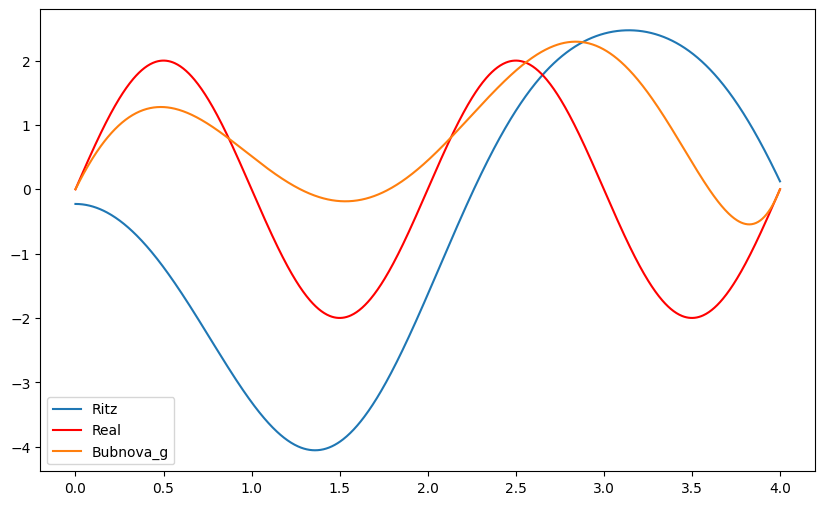

In [19]:
draw(k,q,rhs,mu1,mu2,a,b,alpha1, alpha2, 5, W_basis, 1000)